# Variability

## Remarks
- This describes how spread out (i.e. dispersed) the data points in a dataset are.
- This help us understand how much the values differ from each other and from the central tendency (e.g. mean).
- Common metrics of variability are **Range**, **Variance**, **Standard Deviation (SD)**, and **Interquatile Range(IQR)**. 

## Implementation

,Day,Sales
0,1,152
1,2,142
2,3,64
3,4,156
4,5,121


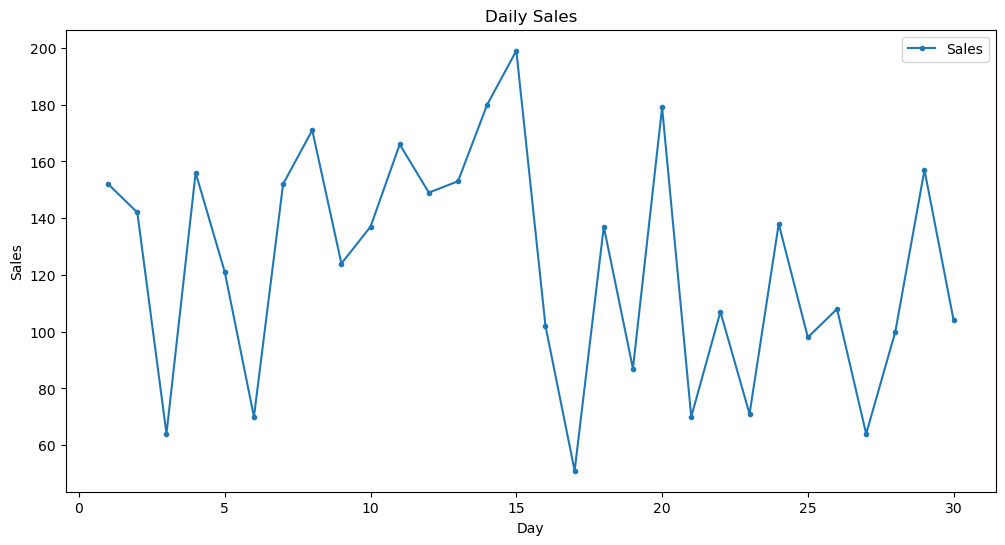

In [1]:
import numpy as np
import pandas as pd

#. Create dataset: daily sales
np.random.seed(42)
sales = np.random.randint(50, 200, size=30)
data = pd.DataFrame({"Day": range(1,31), "Sales": sales})

#. Display data
display( data.head() )

#. Plot sales
ax = data.plot(x="Day", y="Sales", marker='.', figsize=(12,6))
ax.set(title="Daily Sales", xlabel="Day", ylabel="Sales");

### Range

This metric is quick and simple, but sensitive to outliers.

In [3]:
#. Calculate range and print result
range_sales = data["Sales"].max() - data["Sales"].min()
print(f"Range sales: { range_sales }")

Range sales: 148


### Variance

Useful for understanding how data points deviate from the mean.

This one might be hard to interpret since the unit is squared.

In [5]:
#. Calculate variance and print result
variance_sales = data["Sales"].var()
print(f"Variance sales: { variance_sales }")

Variance sales: 1620.3091954022987


### Standard Deviation (SD)

Useful for understanding how data points deviate from the mean.

It is easier to interpret than variance since it keeps the same unit.

In [7]:
#. Calculate standard deviation and print result
std_sales = data["Sales"].std()
print(f"Standard deviation sales: { std_sales }")

Standard deviation sales: 40.253064422504515


### Interquatile Range (IQR)

We can use it when the data is skewed or contains outliers.

One good example of IQR is analyzing salaries to identify typical pay ranges 
without being affected by outliers (e.g. CEOs salaries)

In [9]:
#. Calculate quantiles and print results
q25_sales = data["Sales"].quantile(0.25)
q75_sales = data["Sales"].quantile(0.75)
iqr_sales = q75_sales - q25_sales
print(f"IQR sales: { iqr_sales }")

IQR sales: 54.25


## Plot data...

... **Box-plot** presents the five-number summary of the dataset. They are:

1. **Minimum**: smallest value in the dataset (excluding anomalies).
2. **1st Quartile (Q1)**: median of the lower half (25th).
3. **Median (Q2)**: middle value of the dataset (50th).
4. **3rd Quartile (Q3)**: median of the upper half (75%).
5. **Maximum**: largest value in the dataset (excluding anomalies).

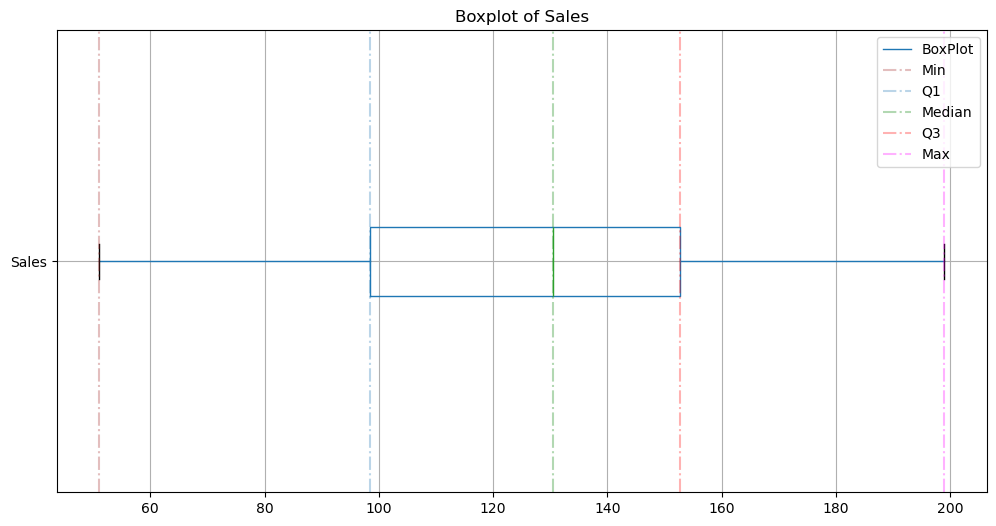

In [17]:
import matplotlib.pyplot as plt

ax = data.boxplot(column=["Sales"], vert=False, figsize=(12,6))
ax.set(title="Boxplot of Sales")

#. THE FOLLOWING LINES ARE NOT NECESSARY...
#. This is just to make it easier for the audience to quick 
#.  understand and interpret BoxPlot.
plt.axvline(data["Sales"].min(), ls='-.', c="brown", alpha=0.3) # Min value
plt.axvline(q25_sales, ls='-.', alpha=0.3) # Q2
plt.axvline(data["Sales"].median(), ls='-.', c="green", alpha=0.3) # Median
plt.axvline(q75_sales, ls='-.', c="red", alpha=0.3) # Q3
plt.axvline(data["Sales"].max(), ls='-.', c="magenta", alpha=0.3) # Max value

plt.legend(["BoxPlot", "Min", "Q1", "Median", "Q3", "Max"]);